In [152]:
import pandas as pd
import numpy as np

In [153]:
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([-6, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

In [154]:
n_samples = 250
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)

In [155]:
def actual_value(samples,m1,m2):
    y=[]
    for i in samples:
        n1=np.linalg.norm(m1-i)
        n2=np.linalg.norm(m2-i)
        val=(n1**2)-(n2**2)
        y.append(val)
    return np.array(y)

In [156]:
m1=np.mean(samples1,axis=0)
m2=np.mean(samples2,axis=0)
samples = np.vstack((samples1, samples2))
print(samples.shape)
y=actual_value(samples,m1,m2)
y=y.reshape(y.shape[0],1)

(500, 2)


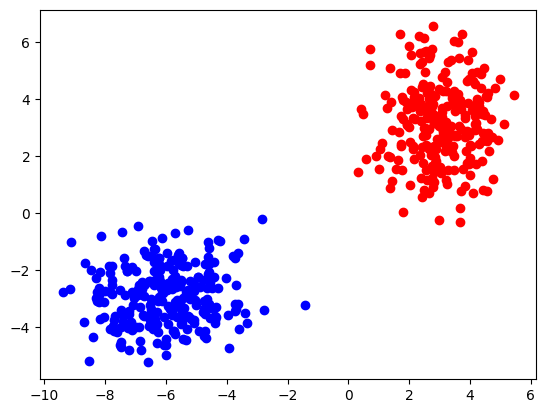

In [157]:
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Samples1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Samples2')
plt.show()

In [158]:
def update(x,w,b,lr,y):
    n=x.shape[0]
    y_pred=np.dot(x,w)+b
    dw=(1/n)*(np.dot(x.T,y_pred-y))
    db=(1/n)*(np.sum(y_pred-y))
    w=w-(lr*dw)
    b=b-(lr*db)
    return w,b

def lwp(samp,y,iter):
    lr=0.01
    w=np.random.rand(2,1)
    b=np.zeros(1)
    for i in range(iter):
        w,b=update(samp,w,b,lr,y)
    
    return w,b


In [159]:
w,b=lwp(samples,y,1000)
print("w is",w,"\n")
print("b is",b,"\n")

w is [[-18.05302047]
 [-12.11398896]] 

b is [-25.51626278] 



In [160]:
def predict_sample(x,w,b):
    y=np.dot(x,w)+b
    if y>0:
        return "samples2"
    else: 
        return "samples1"

In [162]:
X=np.array([10,3])
print(predict_sample(X,w,b))

samples1
